<a href="https://colab.research.google.com/github/tranhuuan170302/GitProject/blob/main/Chu%E1%BA%A9n_ho%C3%A1_d%E1%BB%AF_li%E1%BB%87u_v%E1%BB%9Bi_Robust_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# tạo dataframe

In [2]:
df = pd.DataFrame({
    'beta': np.random.beta(5, 1, 1000) *60,
    'exponential': np.random.exponential(10, 1000),
    'normal_p': np.random.normal(10, 2, 1000),
    'normal_l': np.random.normal(10, 10, 1000)
}
)

In [3]:
df.head()

,beta,exponential,normal_p,normal_l
0,42.576914,21.652682,7.751997,21.846070
1,49.467679,32.994651,9.786026,14.072154
2,56.920193,6.658310,8.897165,13.635454
3,52.657083,4.075123,10.949988,5.406970
4,55.344403,3.575167,6.966992,8.133921


# thêm cột dữ liệu phân phối nhị thức

In [4]:
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])
df['bimodal'] = bimodal

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   beta         1000 non-null   float64
 1   exponential  1000 non-null   float64
 2   normal_p     1000 non-null   float64
 3   normal_l     1000 non-null   float64
 4   bimodal      1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [6]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,42.576914,21.652682,7.751997,21.846070,24.639570
1,49.467679,32.994651,9.786026,14.072154,23.589161
2,56.920193,6.658310,8.897165,13.635454,20.885718
3,52.657083,4.075123,10.949988,5.406970,14.230629
4,55.344403,3.575167,6.966992,8.133921,18.084683


# 1. trực quan hóa dữ liệu

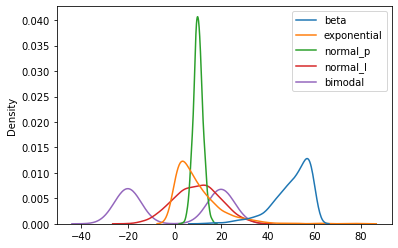

In [7]:
sns.kdeplot(data = df)

# chuẩn hóa với robust scalling

In [8]:
s_scaler = RobustScaler()
df_s = s_scaler.fit_transform(df)

In [11]:
lst = list(df.columns)

In [13]:
df_s = pd.DataFrame(df_s, columns= lst)

In [14]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal
0,-0.941906,1.329839,-0.889780,0.902965,0.631138
1,-0.287597,2.367242,-0.103334,0.320493,0.604907
2,0.420053,-0.041634,-0.447007,0.287772,0.537396
3,0.015252,-0.277907,0.346705,-0.328760,0.371204
4,0.270425,-0.323636,-1.193298,-0.124439,0.467448


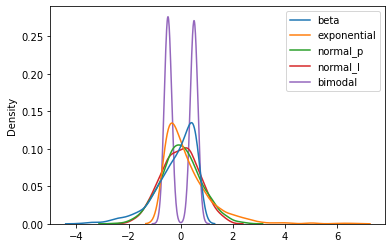

In [15]:
sns.kdeplot(data= df_s)

- lấy giá trị min có tất cả các cột

In [21]:
mins = [df_s[col].min() for col in df_s.columns]

In [22]:
mins

[-3.819586476492095,
 -0.6493583738094508,
 -2.5525217081630385,
 -2.1820097702600494,
 -0.7041896777537003]

- lấy giá trị max ở mỗi cột

In [19]:
maxs = [df_s[col].max() for col in df_s.columns]

In [20]:
maxs

[0.7115776260022211,
 6.577547499780501,
 2.562920330503341,
 1.8439091872517586,
 0.7106147254546429]

- giá trị trung vị của các giá trị gốc

In [24]:
s_scaler.center_

array([52.49646268,  7.11349541, 10.0532844 ,  9.79473031, -0.63413133])